# Processing Data and Making 2D Images

This notebook demonstrates how to open a Nanosurf image file (*.nid) and perform basic post-processing operations.

You can download NSFopen package by "pip install nanosurf" or "pip install NSFopen".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required modules
from NSFopen.read import read

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import the data
filename = "/content/drive/Shareddrives/Physics Lab 3/AFM_Data/Spectroscopy/Silicon  que funca00001.nid" # insert your filepath here

afm = read(filename)
data = afm.data

In [ ]:
# make a function to flatten the image with an optional mask
def flatten(data, order=1, mask=[]):
    data_out = np.copy(data)  # create copy of data
    data_in = np.copy(data)
    if np.any(mask):
        data_in[mask] = np.nan
    for idx, (out, line) in enumerate(zip(data_out, data_in)):
        ix = np.isfinite(line)

        x = np.arange(len(line))
        p = np.polyfit(x[ix], line[ix], order)  # fit data to polynomial
        y = np.polyval(p, x)
        data_out[idx] = out - y  # subtract fit from data
    return data_out

In [ ]:
Zaxis = data['Image']['Forward']['Z-Axis'] * 1e9  # height data scaled to nanometers

Zaxis_ = flatten(Zaxis, order=1)  # flatten data with 1st order polynomial (i.e. line)

In [ ]:
# X and Y data is stored in the parameters
param = afm.param
extents = [param[i][j][0] * 1e6 for i in ['X','Y'] for j in ['min', 'range']]

We want to limit the color range of the plot to not include the upper and lower 2% of data

In [ ]:
Zaxis_.shape

(256, 256)

In [ ]:
# caluculate the 2% and 98% percentiles
clip = [np.percentile(Zaxis_, percent) for percent in [2, 98]]

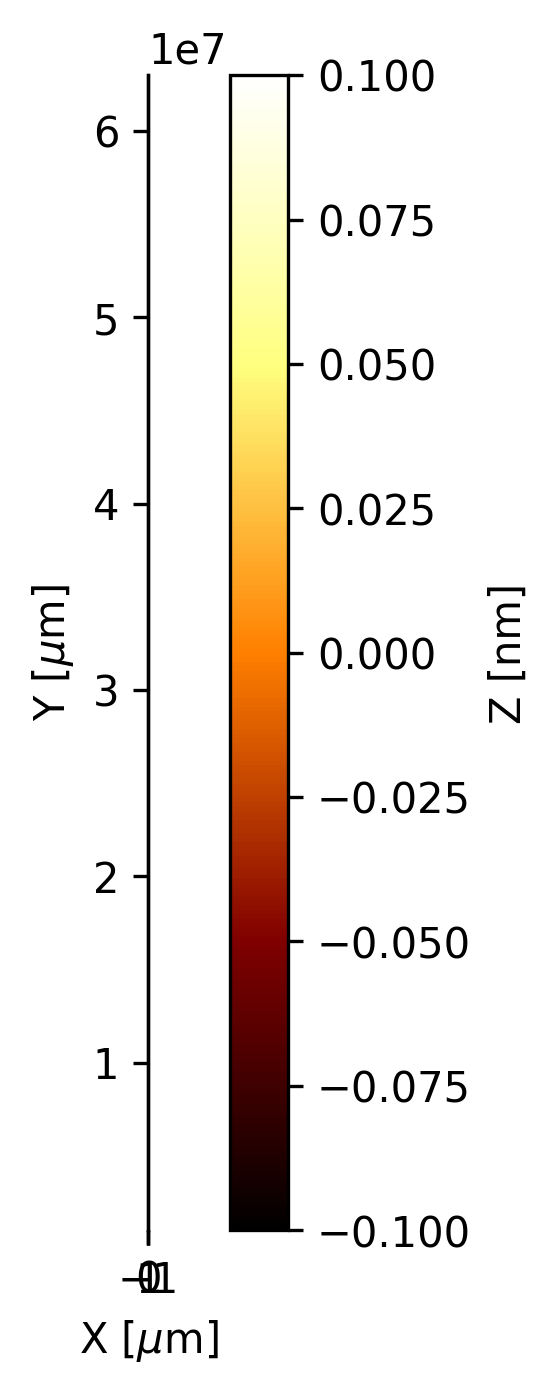

In [ ]:
# define function to plot data with colorbar
def plot2D(data, extents=extents, limits=clip):
    plt.figure(figsize=(7, 5), dpi=300)
    im = plt.imshow(data,
                    extent = extents,
                    origin = 'lower',
                    clim = limits,
                    cmap='afmhot')

    plt.xlabel('X [$\mu$m]')
    plt.ylabel('Y [$\mu$m]')
    cb = plt.colorbar(im)
    cb.set_label('Z [nm]')
    plt.show()

plot2D(Zaxis_, extents=extents, limits=clip)

In [ ]:
# create mask to ignore data > 2 nm
mask = Zaxis_ > 2

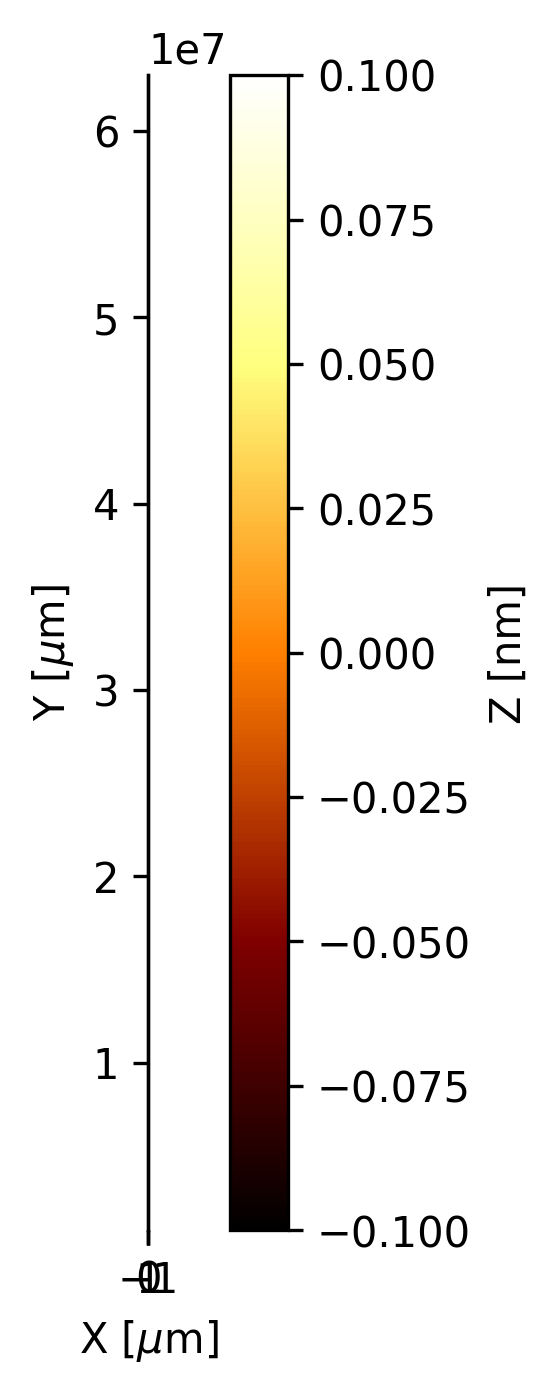

In [ ]:
# flatten data again but using mask
Zaxis_2 = flatten(Zaxis_, mask=mask)
plot2D(Zaxis_2)